# La dynamique des populations
---
<div style="text-align: center;">
    <div style="display: inline-block; position: relative; width: 350px;">
        <img src="../img/_da709904-9305-4b95-a50f-3ac37b077133.jpeg" alt="Dessin" style="width: 100%;"/>
        <p style="text-align: center; margin-top: 5px;">
            <span style="font-style: italic; font-size: 16px;"> Course et destinée </span><br/>
            <span style="font-style: italic; font-size: 12px;">Image générée par DALL·E 3, 2024 </span>
        </p>
    </div>
</div>

## Mise en contexte:

### La dynamique des populations:

Pour prédire et comprendre la dynamique des populations, des modèles mathématiques avec équations différentielles sont utilisés. En général, celles-ci dépendent de nombreux facteurs et sont extrêmement complexes à modéliser. 

Cela dit, certaines dynamiques "simples" peuvent être modélisées par des équations différentielles ordinaires (EDO). 

- L'équation logistique de Verhulst: croissance d'une population en fonction du temps, en prenant en compte les limitations environnementales.

- Les équations de Lotka-Volterra: interactions prédateur-proie dans un écosystème.


### La méthode d'Euler:
La méthode d'Euler est une technique numérique utilisée pour résoudre des équations différentielles ordinaires. 

Voici un résumé de la méthode d'Euler :

- Discrétisation du temps : La première étape consiste à diviser le temps en intervalle (ou le "pas" de temps), ce qui crée une discrétisation du temps. 

- Condition initiale : la valeur initiale de la variable dépendante à un certain moment, c'est-à-dire la condition initiale, sert de point de départ pour résoudre l'EDO.

- Approximation de la dérivée : À chaque pas de temps, la dérivée approximée est calculée en multipliant le taux de variation local par la taille du pas de temps.

- Mise à jour de la variable dépendante : La nouvelle valeur de la variable dépendante est calculée en ajoutant la dérivée approximée à la valeur actuelle de la variable. Cela correspond à un pas de temps en avant.

- Répétition : Les étapes 3 et 4 sont répétées pour chaque pas de temps jusqu'à ce que la variable atteigne la valeur finale souhaitée ou jusqu'à ce que le processus atteigne un certain nombre prédéfini d'itérations. C'est à cette étape que la technique de la boucle `for` est utilisé.

# L'équation logistique de Verhulst

L'équation logistique de Verhulst est un modèle mathématique utilisé pour décrire la croissance d'une population en fonction du temps, en prenant en compte les limitations environnementales. Cette équation tire son nom du mathématicien belge Pierre-François Verhulst, qui l'a développée au XIXe siècle pour modéliser la croissance de populations animales, mais elle peut être également appliquée à d'autres domaines, notamment en économie.

L'équation logistique de Verhulst est :

$$
\frac{dN(t)}{dt} = r  N(t)  \left(1 - \frac{N(t)}{K}\right)
$$
où :
- $ \frac{dN(t)}{dt} $ représente le taux de croissance de la population par rapport au temps.
- $ N(t) $ est la taille de la population à un moment $t$.
- $ r $ est le taux de croissance intrinsèque de la population, qui dépend des conditions environnementales et des caractéristiques de l'organisme.
- $ K $ est la capacité de charge de l'environnement, c'est-à-dire la taille maximale que la population peut atteindre en fonction des ressources disponibles.

La croissance d'une population est limitée par des facteurs tels que la disponibilité de nourriture, d'espace ou d'autres ressources. Au fur et à mesure que la population ($ N $) augmente, le terme $ \left(1 - \frac{N}{K}\right) $ reflète la réduction de la croissance due à la saturation des ressources disponibles. Le modèle de Verhulst permet donc de comprendre comment une population peut atteindre un équilibre où la croissance cesse, car elle atteint sa capacité de charge. 

Les éléments de la méthode d'Euler seront:

   - Conditions initiales :
     a) temps initial ($t_0$) ;
     b) Population initiale ($N_0$).
   - Discrétisation du temps: $\Delta t$
   - Calcul de la variation $\Delta N$ à la $n$-ième itération (au temps $t=t_n$):
     $$
     \Delta N = r \cdot N_n \cdot \left(1 - \frac {N_n}{K}\right) \cdot \Delta t
     $$
   - Mise à jour de $N$ en vue de la $n+1$-ième itération (au temps $t=t_{n+1}$) :
     $$
     N_{n+1} = N_n + \Delta N
     $$
   - Incrémentation du temps : $t_{n+1} = t_n + \Delta t$.

   - À partir de $t = t_0$, on répète l'itération jusqu'à ce que $t$ atteigne la valeur finale $t_f$:


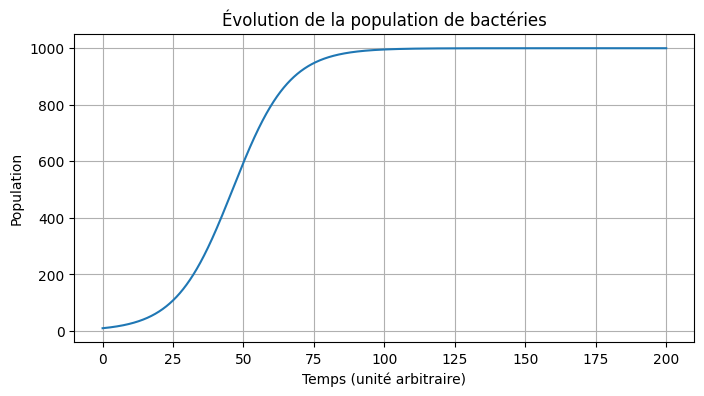

In [1]:
# Initialisation des modules nécessaires:
import numpy as np
import matplotlib.pyplot as plt

# Méthode d'Euler: **Initialisation des variables** :

# Paramètres de l'équation logistique de Verhulst
r = 0.1  # Taux de croissance intrinsèque
K = 1000  # Capacité de charge de l'environnement
dt = .1  # Intervalle de temps
T = 200  # Durée de la simulation

# Méthode d'Euler: **Création des listes**

# Initialisation des listes pour stocker les données à chaque itération:
time_points = [0]  # temps initial
population = [10]  # Population initiale

# Méthode d'Euler: **Itération**

# Boucle for pour résoudre l'équation de Verhulst: 
# "for t" : C'est une boucle "for" en Python, qui itère sur une variable "t". À chaque itération, "t" prendra une nouvelle valeur.
# "in" : C'est le mot-clé "in" qui indique que nous allons itérer sur une séquence de valeurs.
# "np.arange(dt, T + dt, dt)" : C'est la séquence de valeurs sur laquelle nous itérons. "np.arange" crée un tableau de valeurs espacées de manière régulière. 
#  Dans ce cas, il génère une séquence de valeurs commençant à "dt" (la première valeur), se terminant à "T + dt" (la dernière valeur), avec un pas de "dt" (l'espacement entre les valeurs).
for t in np.arange(dt, T + dt, dt):
    # dNdt correspond au taux de variation.  
    dN = r * population[-1] * (1 - population[-1] / K)* dt
    N = population[-1] + dN
    time_points.append(t)
    population.append(N)


# Tracé du graphique de l'évolution de la population
plt.figure(figsize=(8, 4))
plt.plot(time_points, population)
plt.xlabel("Temps (unité arbitraire)")
plt.ylabel("Population")
plt.title("Évolution de la population de bactéries")
plt.grid()
plt.show()

# Les équations de Lotka-Volterra

Les équations de Lotka-Volterra sont un système d'équations différentielles utilisé pour modéliser les interactions entre populations de proies ($N$) et de prédateurs ($P$) dans un écosystème. Elles ont été proposées indépendamment par Alfred J. Lotka en 1925 et Vito Volterra en 1926. Ces équations sont essentielles dans l'étude des dynamiques des populations.

Le modèle de Lotka-Volterra est :

\begin{array}{ccc}\dfrac{\mathrm{d}N(t)}{\mathrm{d}t} &=& N(t)\Big(\alpha - \beta P(t)\Big) \\
\dfrac{\mathrm{d}P(t)}{\mathrm{d}t} &=& P(t)\Big( \delta N(t) - \gamma\Big) 
\end{array}

où :

- $N(t)$ et $P(t)$ représentent respectivement les populations de proies et de prédateurs au cours du temps $t$.
- $\alpha$ représente le taux de croissance intrinsèque des proies (indépendants des prédateurs).
- $\beta$ représente le taux de mortalité des proies (dû au nombre de prédateurs).
- $\gamma$ représente le taux de mortalité intrinsèque des prédateurs (indépendants des proies).
- $\delta$ représente le taux de croissance des prédateurs (dû aux nombre de proies).

Les équations de Lotka-Volterra prédisent ainsi des cycles périodiques de croissance et de décroissance des populations de proies et de prédateurs. Les proies se multiplient lorsqu'elles ne sont pas affectées par les prédateurs, mais leur croissance est limitée par la prédation. Les prédateurs se reproduisent en consommant des proies, mais leur population diminue lorsqu'il y a pénurie de nourriture.




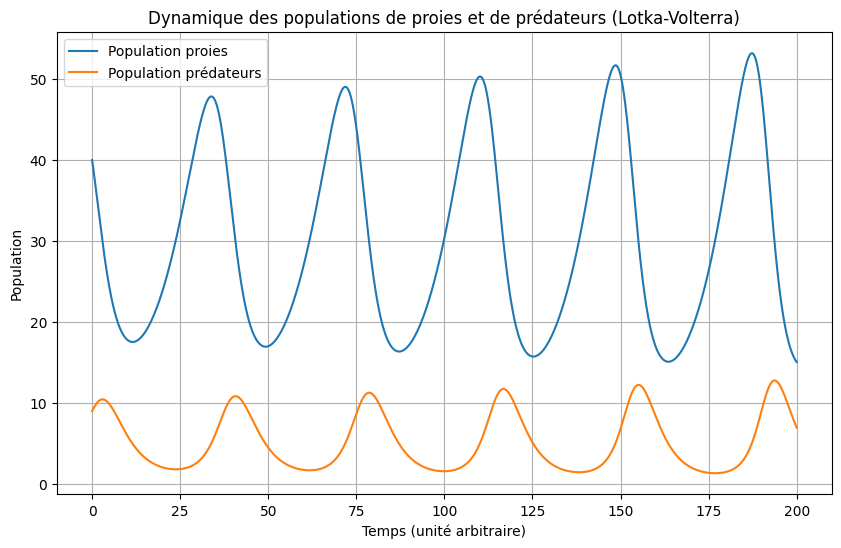

In [2]:
# Initialisation des modules nécessaires:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres des équations de Lotka-Volterra
alpha = 0.1  # Taux de reproduction intrinsèque des proies
beta = 0.02  # Taux de prédation
gamma = 0.3  # Taux de décroissance intrinsèque des prédateurs
delta = 0.01  # Efficacité de la prédation

# Conditions initiales
N0 = 40  # Population initiale de proies
P0 = 9   # Population initiale de prédateurs

# Intervalle de temps et nombre d'itérations
dt = 0.1
T = 200
num_iterations = int(T / dt)

# Initialisation des listes pour stocker les données
time_points = [0]
prey_population = [N0]
predator_population = [P0]

# Boucle for pour résoudre les équations de Lotka-Volterra avec la méthode d'Euler
for i in range(num_iterations):
    dN = prey_population[-1] * ( alpha - beta * predator_population[-1]) * dt
    dP = predator_population[-1] * ( delta * prey_population[-1] - gamma) * dt

    N = prey_population[-1] + dN
    P = predator_population[-1] + dP

    time_points.append(time_points[-1] + dt)
    prey_population.append(N)
    predator_population.append(P)

# Tracé du graphique de l'évolution des populations de proies et de prédateurs
plt.figure(figsize=(10, 6))
plt.plot(time_points, prey_population, label='Population proies')
plt.plot(time_points, predator_population, label='Population prédateurs')
plt.xlabel("Temps (unité arbitraire)")
plt.ylabel("Population")
plt.title("Dynamique des populations de proies et de prédateurs (Lotka-Volterra)")
plt.legend()
plt.grid()
plt.show()